In [306]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pickle
import sys
from sys import exc_info
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize #get the function needed to normalize our data.
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier #the object class we need


In [307]:
# from google.colab import drive
# drive.mount('/content/drive')

In [308]:
#Importing both the file using pandas 
data_x = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/KELAS/swarm intelegence/tugas besar/bahan/datax_ratingsdata2.csv')  

In [309]:
data_x

,Unnamed: 0,UserID,MovieID,Rating
0,0,75.0,2294,5.0
1,1,53.0,1282,5.0
2,2,36.0,1963,5.0
3,3,88.0,1394,1.0
4,4,36.0,3147,5.0
...,...,...,...,...
95,95,48.0,1265,3.0
96,96,58.0,1213,5.0
97,97,70.0,3175,5.0
98,98,8.0,150,4.0


In [310]:
data_x = data_x.drop('Unnamed: 0',axis = 1)


In [311]:
data_x

,UserID,MovieID,Rating
0,75.0,2294,5.0
1,53.0,1282,5.0
2,36.0,1963,5.0
3,88.0,1394,1.0
4,36.0,3147,5.0
...,...,...,...
95,48.0,1265,3.0
96,58.0,1213,5.0
97,70.0,3175,5.0
98,8.0,150,4.0


In [312]:
data_x.describe()

,UserID,MovieID,Rating
count,100.000000,100.000000,100.00000
mean,47.370000,1897.040000,3.82000
std,26.406555,1177.119416,1.00885
min,2.000000,11.000000,1.00000
25%,26.000000,1024.750000,3.00000
50%,48.000000,1871.000000,4.00000
75%,62.250000,2799.750000,5.00000
max,99.000000,3927.000000,5.00000


In [313]:
x_array =  np.array(data_x)
print(x_array)

[[7.500e+01 2.294e+03 5.000e+00]
 [5.300e+01 1.282e+03 5.000e+00]
 [3.600e+01 1.963e+03 5.000e+00]
 [8.800e+01 1.394e+03 1.000e+00]
 [3.600e+01 3.147e+03 5.000e+00]
 [3.300e+01 3.639e+03 5.000e+00]
 [2.200e+01 2.617e+03 3.000e+00]
 [4.900e+01 2.880e+02 4.000e+00]
 [2.400e+01 3.448e+03 5.000e+00]
 [9.000e+01 2.302e+03 3.000e+00]
 [3.800e+01 5.880e+02 4.000e+00]
 [5.300e+01 1.930e+02 4.000e+00]
 [5.300e+01 3.557e+03 4.000e+00]
 [5.800e+01 1.060e+03 4.000e+00]
 [8.300e+01 2.581e+03 1.000e+00]
 [5.300e+01 2.598e+03 4.000e+00]
 [1.700e+01 3.624e+03 4.000e+00]
 [9.700e+01 2.303e+03 4.000e+00]
 [9.000e+01 1.136e+03 5.000e+00]
 [5.900e+01 7.500e+02 4.000e+00]
 [5.000e+00 1.909e+03 3.000e+00]
 [2.500e+01 1.270e+03 5.000e+00]
 [5.800e+01 3.927e+03 4.000e+00]
 [4.800e+01 1.015e+03 3.000e+00]
 [4.200e+01 2.662e+03 4.000e+00]
 [3.300e+01 3.844e+03 5.000e+00]
 [2.800e+01 1.748e+03 3.000e+00]
 [8.300e+01 3.155e+03 5.000e+00]
 [9.900e+01 1.193e+03 2.000e+00]
 [5.000e+00 4.700e+01 3.000e+00]
 [4.200e+0

In [314]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.75257732, 0.58299285, 1.        ],
       [0.5257732 , 0.32456588, 1.        ],
       [0.35051546, 0.49846782, 1.        ],
       [0.88659794, 0.3531665 , 0.        ],
       [0.35051546, 0.80081716, 1.        ],
       [0.31958763, 0.92645557, 1.        ],
       [0.20618557, 0.66547497, 0.5       ],
       [0.48453608, 0.07073544, 0.75      ],
       [0.22680412, 0.87768131, 1.        ],
       [0.90721649, 0.58503575, 0.5       ],
       [0.37113402, 0.14734423, 0.75      ],
       [0.5257732 , 0.046476  , 0.75      ],
       [0.5257732 , 0.90551583, 0.75      ],
       [0.57731959, 0.26787538, 0.75      ],
       [0.83505155, 0.65628192, 0.        ],
       [0.5257732 , 0.66062308, 0.75      ],
       [0.15463918, 0.92262513, 0.75      ],
       [0.97938144, 0.58529111, 0.75      ],
       [0.90721649, 0.28728294, 1.        ],
       [0.58762887, 0.18871297, 0.75      ],
       [0.03092784, 0.48467824, 0.5       ],
       [0.2371134 , 0.32150153, 1.        ],
       [0.

In [315]:
import numpy as np
gen_rand = lambda a, b, c: np.random.uniform(low = a, high = b, size = c)

def gen_centroid (n_centroid, dim):
  return gen_rand(0,1,(n_centroid,dim))



In [316]:
from sklearn.neighbors import KNeighborsRegressor

def calculate_fitness(centroidbaru,x_scaled,params):
  # print(centroidbaru)
  kmeans = KMeans(n_clusters=params['n_centroid'], init = centroidbaru, max_iter = params['knn_iter'], n_init = 1, random_state = 0)
  kmeans.fit(x_scaled)
  data_x=pd.DataFrame(x_scaled)
  data_x['Cluster']=kmeans.labels_
  sum=0
  for i in range(params['n_centroid']):
    data_per_cluster=data_x.loc[data_x['Cluster']==i]
    X1 = data_per_cluster.iloc[:,:1] #create the X matrix)
    y1 = data_per_cluster.iloc[:,-2] #create the y-variable
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
    knn1 = KNeighborsRegressor(n_neighbors=params['k']) #create a KNN-classifier 
    knn1 = knn1.fit(X1_train, y1_train) #this fits the k-nearest neigbor model with the 
    mae1=mean_absolute_error(y1_test, knn1.predict(X1_test))
    sum += mae1

  return sum/params['n_centroid']






In [317]:
def gen_populasi(params):
  return [ gen_centroid(params['n_centroid' ], params['dim']) for i in range (params['n_individu']) ]



In [318]:
def gen_random_populasi(params, sz):
  return [ gen_centroid(params['n_centroid' ], params['dim']) for i in range (sz) ]



In [319]:
def cal_fit_all(populasi, params,x_scaled ):
  # print(populasi)
  return [calculate_fitness( centroidbaru,x_scaled,params) for centroidbaru in populasi]

In [320]:
from scipy.stats import levy_stable as l
def movement(centroid, params):
  return [ i+ params['alpha'] * l.rvs( params['lb1'], params['lb2']) for i in centroid ]

In [321]:
def movement_individu(individu, params):
  return[movement(centroid, params) for centroid in individu]

In [322]:
def movement_populasi(populasi, params):
  
  return [np.array(movement_individu(individu,params)) if i > 0 else individu for i, individu in enumerate(populasi)]



In [323]:
def sort_fitness(populasi, fitnes_x):
  series_populasi=pd.Series(populasi)
  series_fitness=pd.Series(fitnes_x)
  datamae=pd.DataFrame({'individu':series_populasi,'Fitness':series_fitness})
  datamae=datamae.sort_values(by='Fitness')


  return datamae['individu'].values.tolist(), datamae['Fitness'].values.tolist()
  

In [324]:
from scipy.sparse.construct import rand
def selec(populasi, params):
    # print(populasi)
    pa = np.round( np.random.uniform(0,1) * (len(populasi) -1) ).astype(int)
    # print(pa)
    # sz = populasi[:-pa][:].shape
    for i in range(params['n_individu'] -1, params['n_individu']- pa + 1 , -1):
      populasi[i]=gen_random_populasi(params, 1)[0]



    # populasi[:-pa][:] = gen_random_populasi(params, pa)
    return populasi

In [325]:
centroidbaru=gen_centroid(3,3)
centroidbaru

array([[0.42088159, 0.65509396, 0.79758206],
       [0.16277446, 0.71443255, 0.30833846],
       [0.30989107, 0.37692135, 0.28758322]])

In [336]:
# random.seed(5)
params={'n_centroid':3,
        'dim':3,
        'knn_iter':300,
        'k':3,
        'n_individu':100,
        'alpha':0.01,
        'lb1':1.8,
        'lb2':0.5,
        'max_generasi': 100
    
}
populasi=(gen_populasi(params))
# print(populasi)
fitnes_x= cal_fit_all(populasi, params,x_scaled)
populasi, fitnes_x= sort_fitness(populasi, fitnes_x)
# print(populasi)
temp=[]
iterasi = 0
while iterasi<params['max_generasi']:
  populasi=selec(populasi, params)

  populasi=movement_populasi(populasi, params)
  # print(populasi)
  fitnes_x=cal_fit_all(populasi, params,x_scaled)
  populasi, fitnes_x= sort_fitness(populasi, fitnes_x)
  # print(iterasi)
  temp.append(fitnes_x[0])
  iterasi=iterasi+1



print('nilai fitness terbaik dari masing masing generasi =',temp)
print('nilai fitnes terbaiknya adalah', fitnes_x[0])
print(populasi[0])



nilai fitness terbaik dari masing masing generasi = [0.12530864197530867, 0.12530864197530867, 0.12530864197530867, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.11533605283605285, 0.

In [337]:
savetemp1=temp.copy()
savefitnes1=fitnes_x.copy()
savepopulasi1=populasi[0].copy()

In [327]:
# solusiterbaik=pd.Series(temp)
# iterasian=pd.Series(range(0,params['max_generasi']))
# iterasian


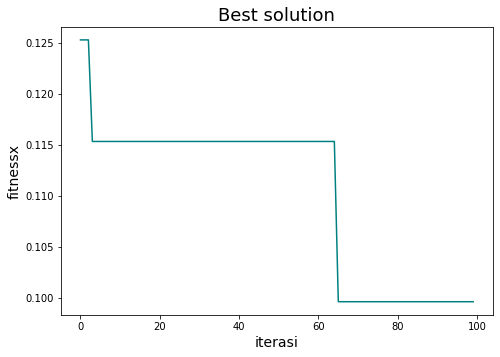

In [340]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(temp, color='teal')
plt.title('Best solution', size=18)
plt.ylabel('fitnessx',labelpad=params[], size=14)
plt.xlabel('iterasi', size=14)
plt.show()

In [ ]:

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.plot(temp, color='teal')
# plt.title('Best solution', size=18)
# plt.ylabel('fitnessx', size=14)
# plt.xlabel('iterasi', size=14)
# plt.show()

In [329]:
# params={'n_centroid':3,
#         'dim':3,
#         'knn_iter':300,
#         'k':3,
#         'n_individu':10,
#         'alpha':1,
#         'lb1':1.8,
#         'lb2':0.5,
#         'max_generasi': 10
    
# }
# populasi=(gen_populasi(params))
# # print(populasi)
# fitnes_x= cal_fit_all(populasi, params,x_scaled)
# populasi, fitnes_x= sort_fitness(populasi, fitnes_x)
# # print(populasi)
# temp=[]
# iterasi = 0
# while iterasi<params['max_generasi']:
#   populasi=selec(populasi, params)

#   populasi=movement_populasi(populasi, params)
#   # print(populasi)
#   fitnes_x=cal_fit_all(populasi, params,x_scaled)
#   populasi, fitnes_x= sort_fitness(populasi, fitnes_x)
#   # print(iterasi)
#   temp.append(fitnes_x[0])
#   iterasi=iterasi+1



# print('nilai fitness terbaik dari masing masing generasi =',temp)
# print('nilai fitnes terbaiknya adalah', fitnes_x[0])
# print(populasi[0])

